In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

In [13]:

# Load the dataset
file_path = 'chicago_preprocessed.csv'
data = pd.read_csv(file_path)
 
# Aggregating the data
aggregated_data = data.groupby(['Airbnb Host ID', 'superhost_period_all']).agg({
    'Superhost': 'max',
    'superhost_change': 'max',
    'superhost_change_lose_superhost': 'max',
    'superhost_change_gain_superhost': 'max',
    'rating_ave_pastYear': 'mean',
    'numReviews_pastYear': 'median',
    'numCancel_pastYear': 'mean',
    'num_5_star_Rev_pastYear': 'mean',
    'prop_5_StarReviews_pastYear': 'mean',
    'numReservedDays_pastYear': 'mean',
    'numReserv_pastYear': 'mean',
    'available_days': 'mean',
    'available_days_aveListedPrice': 'median',
    'booked_days': 'mean',
    'booked_days_avePrice': 'median',
    'Property Type': lambda x: x.mode()[0] if not x.mode().empty else None,
    'Listing Type': lambda x: x.mode()[0] if not x.mode().empty else None,
    'Bedrooms': 'median',
    'Bathrooms': 'median',
    'Neighborhood': lambda x: x.mode()[0] if not x.mode().empty else None,
    'Max Guests': 'median',
    'Cleaning Fee (USD)': 'mean',
    'Minimum Stay': 'median',
    'Number of Photos': 'median',
    'Pets Allowed': lambda x: x.mode()[0] if not x.mode().empty else None,
    'Instantbook Enabled': lambda x: x.mode()[0] if not x.mode().empty else None,
    'Nightly Rate': 'median',
    'Number of Reviews': 'median',
    'Rating Overall': 'mean',
    'revenue': 'median',
    'occupancy_rate': 'mean',
    'property_age_months': 'median'
}).reset_index()

# Standardize variations of Bed & Breakfast
aggregated_data['Property Type'] = aggregated_data['Property Type'].replace({
    'Bed & Breakfast': 'Bed_and_Breakfast',
    'Bed and breakfast': 'Bed_and_Breakfast',
    'Bed &amp; Breakfast': 'Bed_and_Breakfast'
})

# Save the aggregated data to a CSV file
output_file_path = 'host_level_aggregated_chicago_data.csv'
aggregated_data.to_csv(output_file_path, index=False)

print(f"Aggregated data has been exported to {output_file_path}")


Aggregated data has been exported to host_level_aggregated_chicago_data.csv


In [22]:
aggregated_data = pd.read_csv('host_level_aggregated_chicago_data.csv')

In [23]:
aggregated_data.shape

(42558, 34)

In [24]:
print(aggregated_data.isnull().sum())

Airbnb Host ID                     0
superhost_period_all               0
Superhost                          0
superhost_change                   0
superhost_change_lose_superhost    0
superhost_change_gain_superhost    0
rating_ave_pastYear                0
numReviews_pastYear                0
numCancel_pastYear                 0
num_5_star_Rev_pastYear            0
prop_5_StarReviews_pastYear        0
numReservedDays_pastYear           0
numReserv_pastYear                 0
available_days                     0
available_days_aveListedPrice      0
booked_days                        0
booked_days_avePrice               0
Property Type                      0
Listing Type                       0
Bedrooms                           0
Bathrooms                          0
Neighborhood                       0
Max Guests                         0
Cleaning Fee (USD)                 0
Minimum Stay                       0
Number of Photos                   0
Pets Allowed                       0
I

In [25]:
# Sorting the dataframe by Host ID and period
aggregated_data = aggregated_data.sort_values(by=['Airbnb Host ID', 'superhost_period_all'])

aggregated_data['Next_Period_Superhost'] = aggregated_data.groupby('Airbnb Host ID')['Superhost'].shift(-1)

# Check for missing values and handle them as needed
aggregated_data = aggregated_data.drop_duplicates()

In [26]:
# Save the aggregated data to a CSV file
output_file_path = 'next_period_superhost.csv'
aggregated_data.to_csv(output_file_path, index=False)

print(f"Aggregated data has been exported to {output_file_path}")

Aggregated data has been exported to next_period_superhost.csv


In [27]:
# Identify the maximum period for each host
aggregated_data['max_period'] = aggregated_data.groupby('Airbnb Host ID')['superhost_period_all'].transform('max')

# Remove rows where the current period is the last period for the host
aggregated_data = aggregated_data[aggregated_data['superhost_period_all'] != aggregated_data['max_period']]

# Drop the temporary column used for filtering
aggregated_data = aggregated_data.drop(columns=['max_period'])

# Reset the index for the cleaned DataFrame
aggregated_data = aggregated_data.reset_index(drop=True)

print("Rows for the last period of each host have been removed.")

Rows for the last period of each host have been removed.


In [28]:
aggregated_data.head()

,Airbnb Host ID,superhost_period_all,Superhost,superhost_change,superhost_change_lose_superhost,superhost_change_gain_superhost,rating_ave_pastYear,numReviews_pastYear,numCancel_pastYear,num_5_star_Rev_pastYear,...,Number of Photos,Pets Allowed,Instantbook Enabled,Nightly Rate,Number of Reviews,Rating Overall,revenue,occupancy_rate,property_age_months,Next_Period_Superhost
0,2153.0,5.0,0.0,0.0,0.0,0.0,4.655172,29.0,0.0,21.0,...,6.0,False,0,80.0,3.0,96.500000,546.5,0.370000,23.0,0.0
1,2153.0,12.0,0.0,0.0,0.0,0.0,5.000000,1.0,0.0,1.0,...,6.5,False,1,58.0,2.5,92.613271,455.0,0.412277,52.0,0.0
2,2153.0,13.0,0.0,0.0,0.0,0.0,5.000000,2.0,0.0,2.0,...,8.0,False,1,88.0,4.0,93.613665,1682.0,0.211219,28.0,0.0
3,2153.0,14.0,0.0,0.0,0.0,0.0,5.000000,10.0,1.0,10.0,...,8.0,False,0,55.0,1.0,95.427052,1560.0,0.213357,5.0,0.0
4,2153.0,15.0,0.0,0.0,0.0,0.0,5.000000,12.0,1.0,12.0,...,6.0,False,1,84.0,1.0,100.000000,1370.0,0.474576,45.0,0.0


In [30]:
# Save the aggregated data to a CSV file
output_file_path = 'next_period_superhost_train_test_set.csv'
aggregated_data.to_csv(output_file_path, index=False)

print(f"Aggregated data has been exported to {output_file_path}")

Aggregated data has been exported to next_period_superhost_train_test_set.csv


In [21]:
print(aggregated_data.isnull().sum())

Airbnb Host ID                     0
superhost_period_all               0
Superhost                          0
superhost_change                   0
superhost_change_lose_superhost    0
superhost_change_gain_superhost    0
rating_ave_pastYear                0
numReviews_pastYear                0
numCancel_pastYear                 0
num_5_star_Rev_pastYear            0
prop_5_StarReviews_pastYear        0
numReservedDays_pastYear           0
numReserv_pastYear                 0
available_days                     0
available_days_aveListedPrice      0
booked_days                        0
booked_days_avePrice               0
Property Type                      0
Listing Type                       0
Bedrooms                           0
Bathrooms                          0
Neighborhood                       0
Max Guests                         0
Cleaning Fee (USD)                 0
Minimum Stay                       0
Number of Photos                   0
Pets Allowed                       0
I

Logistic Regression

Preprocessing data...
Splitting dataset into training and testing...
Training the model using GridSearchCV...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/vishnuanand/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vishnuanand/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vishnuanand/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vishnuanand/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/vishnuanan

Best Parameters: {'classifier__C': 5, 'classifier__solver': 'lbfgs'}
Generating training predictions and probabilities...
Generating testing predictions and probabilities...

Training Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.80      0.83     11343
         1.0       0.80      0.86      0.83     10622

    accuracy                           0.83     21965
   macro avg       0.83      0.83      0.83     21965
weighted avg       0.83      0.83      0.83     21965


Test Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.75      0.79      4590
         1.0       0.85      0.90      0.87      7125

    accuracy                           0.84     11715
   macro avg       0.84      0.82      0.83     11715
weighted avg       0.84      0.84      0.84     11715


Test Confusion Matrix:
 [[3444 1146]
 [ 720 6405]]

Training AUC: 0.9138
Testing AUC: 0.9137
Plotting ROC c

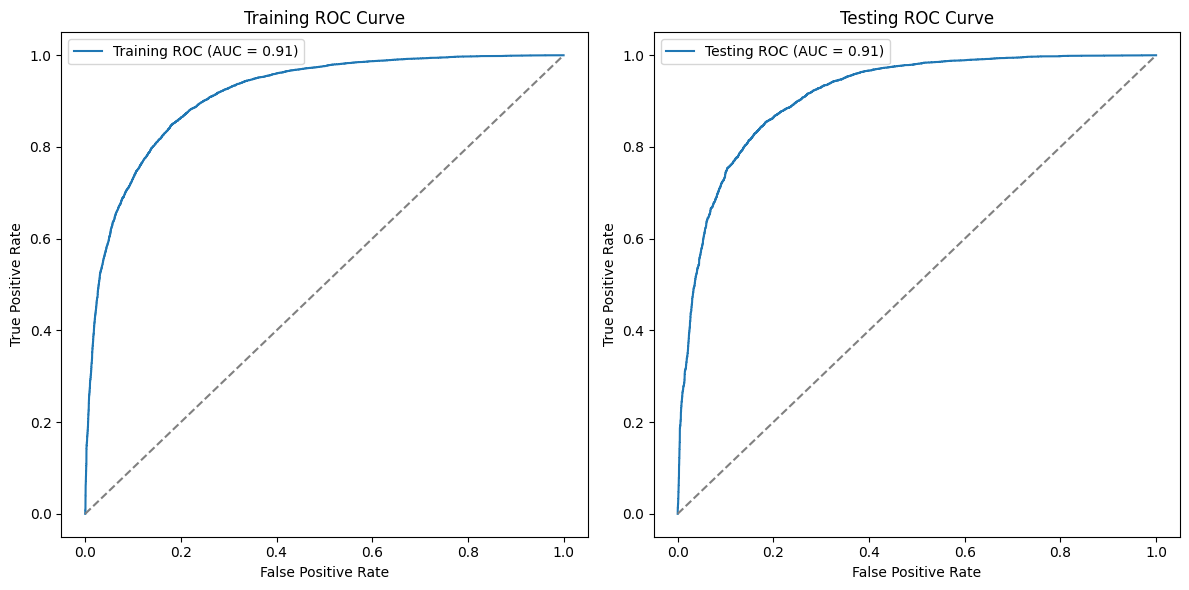

In [34]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Define the categorical and numerical columns
categorical_cols = ['Property Type', 'Listing Type', 'Neighborhood', 'Pets Allowed', 'Instantbook Enabled']
numerical_cols = [
    'rating_ave_pastYear', 'numReviews_pastYear', 'numCancel_pastYear', 'num_5_star_Rev_pastYear',
    'prop_5_StarReviews_pastYear', 'numReservedDays_pastYear', 'numReserv_pastYear', 'available_days',
    'available_days_aveListedPrice', 'booked_days', 'booked_days_avePrice', 'Bedrooms', 'Bathrooms',
    'Max Guests', 'Cleaning Fee (USD)', 'Minimum Stay', 'Number of Photos', 'Nightly Rate',
    'Number of Reviews', 'Rating Overall', 'revenue', 'occupancy_rate', 'property_age_months'
]

print("Preprocessing data...")

# Preprocessing: Scaling numerical and encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ])

# Logistic regression model
model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=2000)

# Pipeline to preprocess and fit the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Split dataset based on superhost_period_all
print("Splitting dataset into training and testing...")
training_data = aggregated_data[aggregated_data['superhost_period_all'] <= 14]
testing_data = aggregated_data[(aggregated_data['superhost_period_all'] >= 15) & (aggregated_data['superhost_period_all'] <= 19)]

X_train = training_data[categorical_cols + numerical_cols]
y_train = training_data['Next_Period_Superhost']

X_test = testing_data[categorical_cols + numerical_cols]
y_test = testing_data['Next_Period_Superhost']

# Hyperparameter grid for logistic regression
param_grid = {
    'classifier__C': [0.05, 0.1, 0.5, 1, 5],
    'classifier__solver': ['liblinear', 'lbfgs']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)

# Fit the model with GridSearchCV on training data
print("Training the model using GridSearchCV...")
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_

# Training predictions and probabilities
print("Generating training predictions and probabilities...")
y_train_prob = best_model.predict_proba(X_train)[:, 1]
y_train_pred = best_model.predict(X_train)

# Testing predictions and probabilities
print("Generating testing predictions and probabilities...")
y_test_prob = best_model.predict_proba(X_test)[:, 1]
y_test_pred = best_model.predict(X_test)

# Model evaluation
print("\nTraining Classification Report:\n", classification_report(y_train, y_train_pred))
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))
print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

# Compute AUC for training and testing
train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

print(f"\nTraining AUC: {train_auc:.4f}")
print(f"Testing AUC: {test_auc:.4f}")

# Plot ROC curves for training and testing
print("Plotting ROC curves...")
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Training ROC curve
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
axes[0].plot(fpr_train, tpr_train, label=f"Training ROC (AUC = {train_auc:.2f})")
axes[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[0].set_title("Training ROC Curve")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].legend()

# Testing ROC curve
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
axes[1].plot(fpr_test, tpr_test, label=f"Testing ROC (AUC = {test_auc:.2f})")
axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[1].set_title("Testing ROC Curve")
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].legend()

plt.tight_layout()
plt.show()

In [35]:

# Read next_period_superhost.csv and filter for period 20
next_period_data = pd.read_csv('next_period_superhost.csv')
next_period_data = next_period_data[next_period_data['superhost_period_all'] == 20]

# Extract features for prediction
X_pred = next_period_data[categorical_cols + numerical_cols]

# Prediction probabilities for the 20th period
y_pred_prob = best_model.predict_proba(X_pred)[:, 1]
y_pred = best_model.predict(X_pred)

# Add predictions to the DataFrame
next_period_data['Predicted_Superhost_Status'] = y_pred
next_period_data['Predicted_Probabilities'] = y_pred_prob

# Display predictions for the 20th period
print("Predictions for the 20th period:\n", next_period_data[['Airbnb Host ID', 'superhost_period_all', 'Predicted_Superhost_Status', 'Predicted_Probabilities']])

Predictions for the 20th period:
        Airbnb Host ID  superhost_period_all  Predicted_Superhost_Status  \
9              2153.0                  20.0                         0.0   
25             2613.0                  20.0                         1.0   
42             3908.0                  20.0                         1.0   
58             4434.0                  20.0                         0.0   
76             5775.0                  20.0                         1.0   
...               ...                   ...                         ...   
42553     336504529.0                  20.0                         1.0   
42554     336859702.0                  20.0                         1.0   
42555     337475785.0                  20.0                         1.0   
42556     339780324.0                  20.0                         0.0   
42557     339971460.0                  20.0                         0.0   

       Predicted_Probabilities  
9                 2.340977e-01  

Random forest

In [36]:
import warnings
warnings.filterwarnings("ignore")

Starting GridSearchCV...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 2/5] END bootstrap=True, max_depth=6, max_features=0.3, max_samples=0.6, n_estimators=300;, score=0.977 total time=   6.0s
[CV 5/5] END bootstrap=True, max_depth=6, max_features=0.3, max_samples=0.6, n_estimators=300;, score=0.978 total time=   6.1s
[CV 4/5] END bootstrap=True, max_depth=6, max_features=0.3, max_samples=0.6, n_estimators=300;, score=0.982 total time=   6.3s
[CV 1/5] END bootstrap=True, max_depth=6, max_features=0.3, max_samples=0.6, n_estimators=300;, score=0.976 total time=   6.3s
[CV 3/5] END bootstrap=True, max_depth=6, max_features=0.3, max_samples=0.6, n_estimators=300;, score=0.982 total time=   7.0s
[CV 1/5] END bootstrap=True, max_depth=6, max_features=0.3, max_samples=0.6, n_estimators=500;, score=0.977 total time=  10.6s
[CV 3/5] END bootstrap=True, max_depth=6, max_features=0.3, max_samples=0.6, n_estimators=500;, score=0.982 total time=  10.9s
[CV 2/5] END bootstrap=T

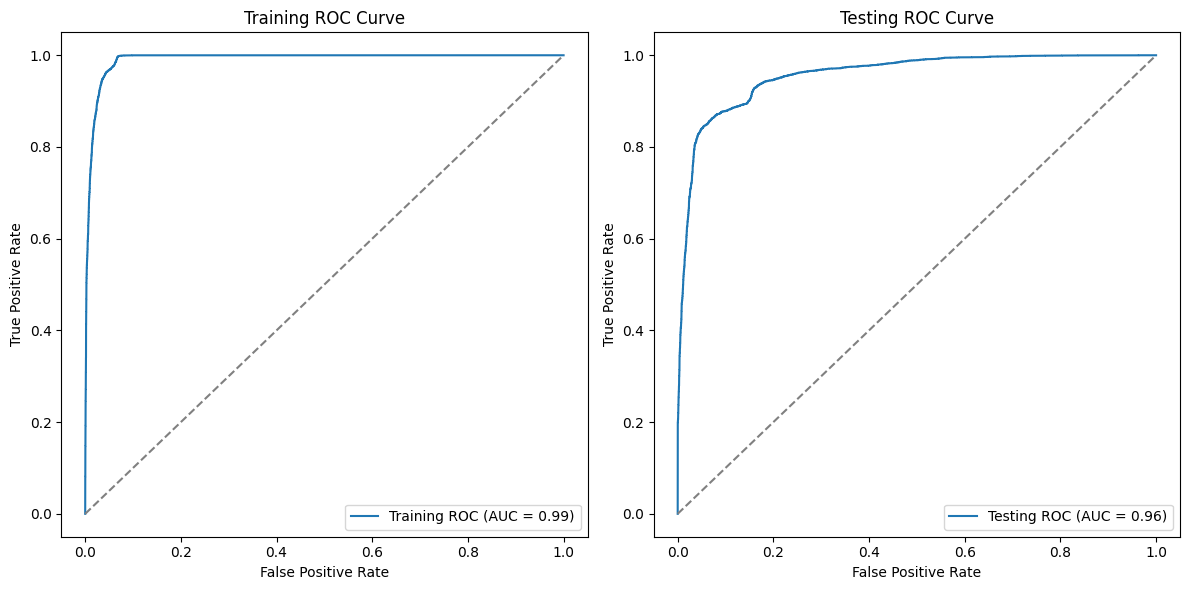

In [45]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Define the categorical and numerical columns
categorical_cols = ['Property Type', 'Listing Type', 'Neighborhood', 'Pets Allowed', 'Instantbook Enabled']
numerical_cols = [
    'rating_ave_pastYear', 'numReviews_pastYear', 'numCancel_pastYear', 'num_5_star_Rev_pastYear',
    'prop_5_StarReviews_pastYear', 'numReservedDays_pastYear', 'numReserv_pastYear', 'available_days',
    'available_days_aveListedPrice', 'booked_days', 'booked_days_avePrice', 'Bedrooms', 'Bathrooms',
    'Max Guests', 'Cleaning Fee (USD)', 'Minimum Stay', 'Number of Photos', 'Nightly Rate',
    'Number of Reviews', 'Rating Overall', 'revenue', 'occupancy_rate', 'property_age_months'
]

# Preprocess the dataset
def preprocess_data(df, categorical_cols, numerical_cols, reference_columns=None):
    # Convert categorical columns to dummy variables
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    # Standardize numerical columns
    scaler = StandardScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    
    # Align columns with reference_columns (if provided)
    if reference_columns is not None:
        # Add missing columns with zeros
        for col in reference_columns:
            if col not in df.columns:
                df[col] = 0
        # Remove extra columns
        df = df[reference_columns]
    
    return df

# Split dataset based on superhost_period_all
training_data = aggregated_data[aggregated_data['superhost_period_all'] <= 14]
testing_data = aggregated_data[(aggregated_data['superhost_period_all'] >= 15) & (aggregated_data['superhost_period_all'] <= 19)]

# Preprocess training data
X_train = preprocess_data(training_data[categorical_cols + numerical_cols], categorical_cols, numerical_cols)
y_train = training_data['Superhost']

# Store reference columns for alignment
reference_columns = X_train.columns

# Preprocess testing data and align with training data columns
X_test = preprocess_data(testing_data[categorical_cols + numerical_cols], categorical_cols, numerical_cols, reference_columns)
y_test = testing_data['Superhost']

# Random Forest model
model = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)

# Set up the Random Forest model with hyperparameter tuning
param_grid = {
    'n_estimators': [300, 500, 700],
    'max_depth': [6, 8, 10],
    'max_features': [0.3, 0.5, 0.7],
    'bootstrap': [True],
    'max_samples': [0.6, 0.7, 0.8]
}

# Initialize GridSearchCV with higher verbosity
grid_search = GridSearchCV(
    model,
    param_grid,
    cv=5,
    scoring='roc_auc',
    verbose=3,
    n_jobs=-1
)

# Fit the model with GridSearchCV
print("Starting GridSearchCV...")
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
print("\nFeature Importances (Top 10):")
feature_importances = best_model.feature_importances_
# Extract feature names
feature_names = list(X_train.columns)
sorted_indices = np.argsort(feature_importances)[::-1]
for idx in sorted_indices[:10]:
    print(f"{feature_names[idx]}: {feature_importances[idx]:.4f}")

# Training predictions and probabilities
y_train_prob = best_model.predict_proba(X_train)[:, 1]
y_train_pred = best_model.predict(X_train)

# Testing predictions and probabilities
y_test_prob = best_model.predict_proba(X_test)[:, 1]
y_test_pred = best_model.predict(X_test)

# Model evaluation
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

# Compute AUC for training and testing
train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

print(f"\nTraining AUC: {train_auc:.4f}")
print(f"Testing AUC: {test_auc:.4f}")

# Plot ROC curves side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Training ROC curve
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
axes[0].plot(fpr_train, tpr_train, label=f"Training ROC (AUC = {train_auc:.2f})")
axes[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[0].set_title("Training ROC Curve")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].legend()

# Testing ROC curve
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
axes[1].plot(fpr_test, tpr_test, label=f"Testing ROC (AUC = {test_auc:.2f})")
axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[1].set_title("Testing ROC Curve")
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].legend()

plt.tight_layout()
plt.show()

In [46]:
# Read next_period_superhost.csv and filter for period 20
next_period_data = pd.read_csv('next_period_superhost.csv')
next_period_data = next_period_data[next_period_data['superhost_period_all'] == 20]

# Preprocess next_period_data and align with training data columns
X_pred = preprocess_data(next_period_data[categorical_cols + numerical_cols], categorical_cols, numerical_cols, reference_columns)

# Prediction probabilities for the 20th period
y_pred_prob = best_model.predict_proba(X_pred)[:, 1]
y_pred = best_model.predict(X_pred)

# Add predictions to the DataFrame
next_period_data['Predicted_Superhost_Status'] = y_pred
next_period_data['Predicted_Probabilities'] = y_pred_prob

# Display predictions for the 20th period
print("Predictions for the 20th period:\n", next_period_data[['Airbnb Host ID', 'superhost_period_all', 'Predicted_Superhost_Status', 'Predicted_Probabilities']])

Predictions for the 20th period:
        Airbnb Host ID  superhost_period_all  Predicted_Superhost_Status  \
9              2153.0                  20.0                         0.0   
25             2613.0                  20.0                         1.0   
42             3908.0                  20.0                         1.0   
58             4434.0                  20.0                         0.0   
76             5775.0                  20.0                         1.0   
...               ...                   ...                         ...   
42553     336504529.0                  20.0                         1.0   
42554     336859702.0                  20.0                         0.0   
42555     337475785.0                  20.0                         0.0   
42556     339780324.0                  20.0                         0.0   
42557     339971460.0                  20.0                         0.0   

       Predicted_Probabilities  
9                     0.048303  

Gradient Boosted Trees

Starting GridSearchCV...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV 3/5] END learning_rate=0.05, max_depth=3, max_features=0.3, n_estimators=100, subsample=0.8;, score=0.982 total time=   2.2s
[CV 5/5] END learning_rate=0.05, max_depth=3, max_features=0.3, n_estimators=100, subsample=0.8;, score=0.979 total time=   2.2s
[CV 4/5] END learning_rate=0.05, max_depth=3, max_features=0.3, n_estimators=100, subsample=0.8;, score=0.984 total time=   2.2s
[CV 2/5] END learning_rate=0.05, max_depth=3, max_features=0.3, n_estimators=100, subsample=0.8;, score=0.980 total time=   2.3s
[CV 1/5] END learning_rate=0.05, max_depth=3, max_features=0.3, n_estimators=100, subsample=0.8;, score=0.978 total time=   2.3s
[CV 2/5] END learning_rate=0.05, max_depth=3, max_features=0.3, n_estimators=100, subsample=0.9;, score=0.980 total time=   2.3s
[CV 3/5] END learning_rate=0.05, max_depth=3, max_features=0.3, n_estimators=100, subsample=0.9;, score=0.983 total time=   2.3s
[CV 1/5]

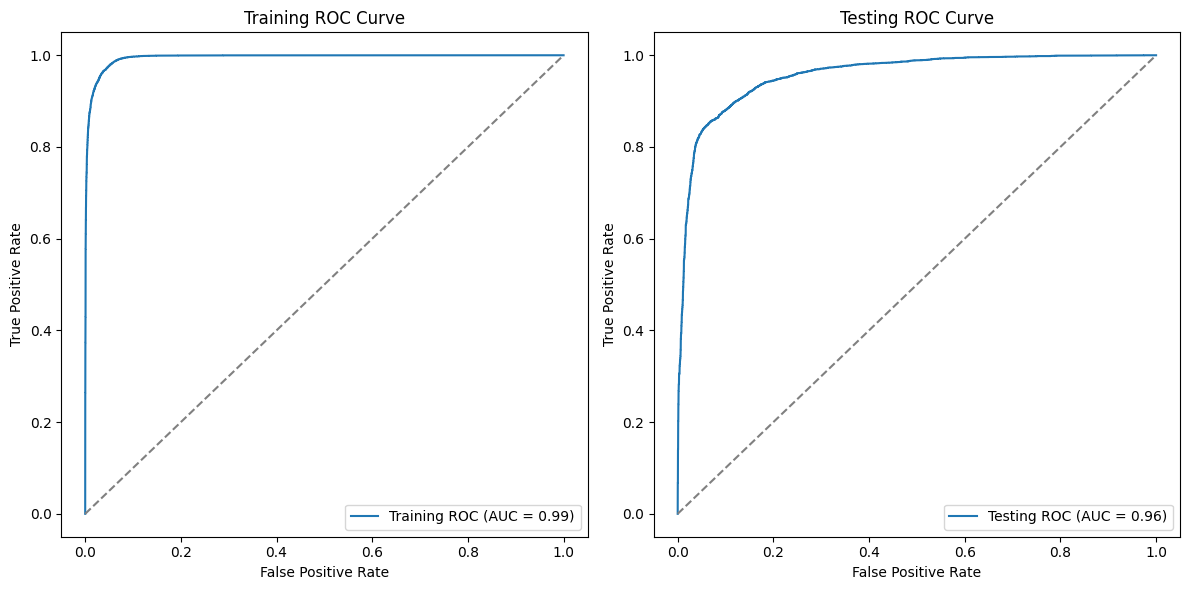

In [47]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Define the categorical and numerical columns
categorical_cols = ['Property Type', 'Listing Type', 'Neighborhood', 'Pets Allowed', 'Instantbook Enabled']
numerical_cols = [
    'rating_ave_pastYear', 'numReviews_pastYear', 'numCancel_pastYear', 'num_5_star_Rev_pastYear',
    'prop_5_StarReviews_pastYear', 'numReservedDays_pastYear', 'numReserv_pastYear', 'available_days',
    'available_days_aveListedPrice', 'booked_days', 'booked_days_avePrice', 'Bedrooms', 'Bathrooms',
    'Max Guests', 'Cleaning Fee (USD)', 'Minimum Stay', 'Number of Photos', 'Nightly Rate',
    'Number of Reviews', 'Rating Overall', 'revenue', 'occupancy_rate', 'property_age_months'
]

# Preprocess the dataset
def preprocess_data(df, categorical_cols, numerical_cols, reference_columns=None):
    # Convert categorical columns to dummy variables
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    # Standardize numerical columns
    scaler = StandardScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    
    # Align columns with reference_columns (if provided)
    if reference_columns is not None:
        # Add missing columns with zeros
        for col in reference_columns:
            if col not in df.columns:
                df[col] = 0
        # Remove extra columns
        df = df[reference_columns]
    
    return df

# Split dataset based on superhost_period_all
training_data = aggregated_data[aggregated_data['superhost_period_all'] <= 14]
testing_data = aggregated_data[(aggregated_data['superhost_period_all'] >= 15) & (aggregated_data['superhost_period_all'] <= 19)]

# Preprocess training data
X_train = preprocess_data(training_data[categorical_cols + numerical_cols], categorical_cols, numerical_cols)
y_train = training_data['Superhost']

# Store reference columns for alignment
reference_columns = X_train.columns

# Preprocess testing data and align with training data columns
X_test = preprocess_data(testing_data[categorical_cols + numerical_cols], categorical_cols, numerical_cols, reference_columns)
y_test = testing_data['Superhost']

# Gradient Boosting model
model = GradientBoostingClassifier(random_state=42)

# Hyperparameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': [0.3, 0.5, 0.7]
}

# Initialize GridSearchCV with higher verbosity
grid_search = GridSearchCV(
    model,
    param_grid,
    cv=5,
    scoring='roc_auc',
    verbose=3,
    n_jobs=-1
)

# Fit the model with GridSearchCV
print("Starting GridSearchCV...")
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
print("\nFeature Importances (Top 10):")
feature_importances = best_model.feature_importances_
# Extract feature names
feature_names = list(X_train.columns)
sorted_indices = np.argsort(feature_importances)[::-1]
for idx in sorted_indices[:10]:
    print(f"{feature_names[idx]}: {feature_importances[idx]:.4f}")

# Training predictions and probabilities
y_train_prob = best_model.predict_proba(X_train)[:, 1]
y_train_pred = best_model.predict(X_train)

# Testing predictions and probabilities
y_test_prob = best_model.predict_proba(X_test)[:, 1]
y_test_pred = best_model.predict(X_test)

# Model evaluation
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

# Compute AUC for training and testing
train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

print(f"\nTraining AUC: {train_auc:.4f}")
print(f"Testing AUC: {test_auc:.4f}")

# Plot ROC curves side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Training ROC curve
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
axes[0].plot(fpr_train, tpr_train, label=f"Training ROC (AUC = {train_auc:.2f})")
axes[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[0].set_title("Training ROC Curve")
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].legend()

# Testing ROC curve
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
axes[1].plot(fpr_test, tpr_test, label=f"Testing ROC (AUC = {test_auc:.2f})")
axes[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
axes[1].set_title("Testing ROC Curve")
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].legend()

plt.tight_layout()
plt.show()